In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
steekproef = pd.ExcelFile("/Users/rikhoekstra/surfdrive/emigratie/emigrantenkaarten/migrant_steekproef_masterdb_20180629.xlsx")
steekproef.sheet_names

['emmigrantunits',
 'emcards',
 'emtravels',
 'emwaardeoordeels',
 'emimages',
 'emevents',
 'emactors',
 'emactorinstitutions',
 'lookup_instellingen',
 'emeventtypes',
 'emcardcatalogs',
 'emconsulates',
 'emvervoermiddels',
 'emtypevervoers',
 'emschemas',
 'emlocations',
 'emreligions',
 'orig',
 'reserve']

In [27]:
events = steekproef.parse('emevents')
events.drop(events.index[:2], inplace=True)
events.drop(events.columns[-1], axis=1, inplace=True)

In [28]:
events.head()

,migrant,Prs_achternaam,actorperson,actorperson.1,actorinstitution,receptorperson,receptorperson.1,receptorinstitution,recording_consulate,subject,day,month,year,remark
4_1705,27632,Meene,27632,NaN,NaN,NaN,NaN,86,86,financien,4,11,1954,kapitaalsaanvraag
4_1705,27632,Meene,27632,NaN,NaN,NaN,NaN,86,86,huisvesting,4,11,1954,formulier aanvraag huis.
4_1705,27632,Meene,NaN,NaN,86,NaN,NaN,86,86,financien,26,11,1954,Kapitaalsopname toegestaan
4_1705,27632,Meene,NaN,NaN,86,NaN,NaN,52,86,financien,18,10,1955,k.o.naar Canberra verzonden
4_1705,27632,Meene,NaN,NaN,52,NaN,NaN,86,86,financien,20,10,1955,toestemming k.o.


We start with some naive measures

- pandas describe
- pivots on
    - actors
    - receptors
    - eventtype

In [29]:
events.describe()

,migrant,Prs_achternaam,actorperson,actorperson.1,actorinstitution,receptorperson,receptorperson.1,receptorinstitution,recording_consulate,subject,day,month,year,remark
count,3755,3755,1476,279,1890,655,387,2577,3653,3652,3655,3655,3655,3753
unique,560,533,386,213,114,267,313,381,12,22,32,14,47,3484
top,42034,Lauwereins,42035,30,12,4928,225,12,12,maatschappelijke begeleiding,1,1,1964,geen contact
freq,124,124,43,13,1035,26,7,905,2421,986,163,380,275,41


In [30]:
grouped = events.groupby(by=['migrant'], as_index=True)
grouped.head()

,migrant,Prs_achternaam,actorperson,actorperson.1,actorinstitution,receptorperson,receptorperson.1,receptorinstitution,recording_consulate,subject,day,month,year,remark
4_1705,27632,Meene,27632,NaN,NaN,NaN,NaN,86,86,financien,4,11,1954,kapitaalsaanvraag
4_1705,27632,Meene,27632,NaN,NaN,NaN,NaN,86,86,huisvesting,4,11,1954,formulier aanvraag huis.
4_1705,27632,Meene,NaN,NaN,86,NaN,NaN,86,86,financien,26,11,1954,Kapitaalsopname toegestaan
4_1705,27632,Meene,NaN,NaN,86,NaN,NaN,52,86,financien,18,10,1955,k.o.naar Canberra verzonden
4_1705,27632,Meene,NaN,NaN,52,NaN,NaN,86,86,financien,20,10,1955,toestemming k.o.
31_0899,2863,Bregman,2863,NaN,NaN,NaN,NaN,12,12,consulaire kerntaken,14,12,1954,hulp bij vrijmaken auto
31_0899,2863,Bregman,2863,NaN,NaN,NaN,NaN,NaN,12,huisvesting,8,12,1954,woont voorlopig bij Groenewegen
31_0899,2863,Bregman,2863,NaN,NaN,NaN,NaN,12,12,financien,20,1,1955,verzoekt uitkering als ex-serviceman
31_0899,2863,Bregman,NaN,NaN,12,2863,105,NaN,12,financien,18,2,1955,betaling bagagerekening
31_0899,2863,Bregman,NaN,106,NaN,2863,NaN,NaN,12,arbeid,28,6,1957,Van der Griend (emigratie-ambtenaar Sydney) be...


In [33]:
pd.pivot_table(events, columns=['subject'],values=['migrant'], aggfunc="count" )

subject,Financien,Gezondheid,Huisvesting,Maatschappelijke begeleiding,administratie,administratief,adminstratie19,adminstratief,aministraftief,arbeid,...,financieel,financien,gezondeheid,gezondheid,gezondneid,huisvesting,maatschappeijle begeleiding,maatschappelijke begeleidinf,maatschappelijke begeleiding,onbekend
migrant,4,3,6,1,1,278,1,10,1,867,...,1,489,1,44,7,221,5,1,986,44


In [35]:
events.subject.unique()

array(['financien', 'huisvesting', 'consulaire kerntaken', 'arbeid',
       'maatschappelijke begeleiding', 'administratief', 'onbekend',
       'Gezondheid', nan, 'aministraftief', 'gezondheid', 'adminstratief',
       'Huisvesting', 'Financien', 'financieel', 'consulaire kerntaak',
       'adminstratie19', 'administratie', 'maatschappeijle begeleiding',
       'Maatschappelijke begeleiding', 'maatschappelijke begeleidinf',
       'gezondeheid', 'gezondneid'], dtype=object)

In [96]:
# there are some obvious mistakes in the event subjects, that we will correct nog

norms = {'financiën': ['financien', 'Financien', 'financien', 'financieel'],
                        'huisvesting' :['huisvesting', 'Huisvesting'],
                        'gezondheid': ['Gezondheid', 'gezondheid','gezondeheid', 'gezondneid'],
                        'administratie': ['administratief','aministraftief', 'adminstratief', 
                                           'adminstratie19', 'administratie'],
                        'maatschappelijke begeleiding' : ['maatschappeijle begeleiding',
       'Maatschappelijke begeleiding', 'maatschappelijke begeleidinf'],
                        'consulaire kerntaak': ['consulaire kerntaak'],
                        'overig': ['onbekend', np.nan]}
         # reverse dictionary for mapping
rev_norms = {svalue: key for key, value in norms.items() for svalue in value}

events['normalized_subject'] = events.subject.replace(rev_norms)
events['normalized_subject'] = events.normalized_subject.astype('category')

#and strange years

events['year'] = events['year'].replace(7977, 1977)
events['year'] = events['year'].replace(1655, 1955)
events['year'] = events['year'].replace(1656, 1956)
events['year'] = events['year'].replace(1696, 1966)



In [69]:
p = pd.pivot_table(events, columns=['normalized_subject'],values=['migrant'], aggfunc="count" )

In [68]:
dates=events[['year', 'month', 'day']].dropna('00')

ValueError: No axis named 00 for object type <class 'pandas.core.frame.DataFrame'>

In [58]:
pd.to_datetime(dict((events.year,events.month,events.day`)   ds dsa

SyntaxError: unexpected EOF while parsing (<ipython-input-58-19498a5db326>, line 1)

In [64]:
for item in [ 'month', 'day']:
   events[item] = events[item].replace(np.nan, '01')
#[[events.year.astype('int64'), events.month.astype('int64'), events.day.astype('int64', )]]]
#events['date']
#events['year']+events['month']+events['day'], format='%Y%m%d')
sdl          akksdas events.loc[pd.isna(events.month)]

,migrant,Prs_achternaam,actorperson,actorperson.1,actorinstitution,receptorperson,receptorperson.1,receptorinstitution,recording_consulate,subject,day,month,year,remark,normalized_subject


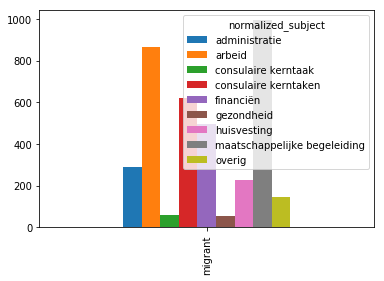

In [71]:
p.plot.bar()

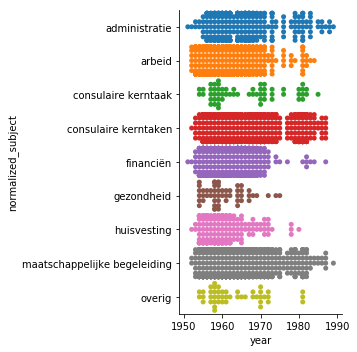

In [81]:
sns.catplot(x="year", y="normalized_subject", kind="swarm", data=events);

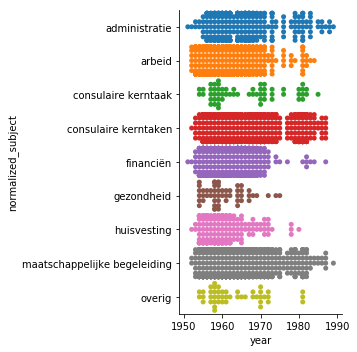

In [82]:
sns.catplot(x="year", y="normalized_subject", kind="swarm", data=events.query("1950 < year < 1990"));

In [98]:
y_S = pd.pivot_table(events, index=['year'],values=["migrant"], columns='normalized_subject', aggfunc=['count'])

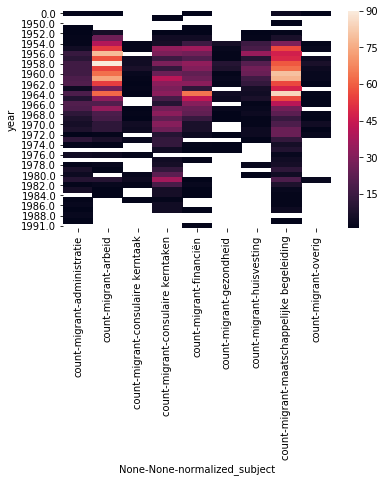

In [100]:
sns.heatmap(y_S)

In [102]:
y_I = pd.pivot_table(events, index=['year'],values=["migrant"], columns=events.actorinstitution, aggfunc=['count'])

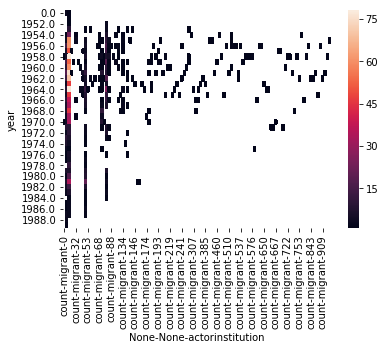

In [103]:
sns.heatmap(y_I)

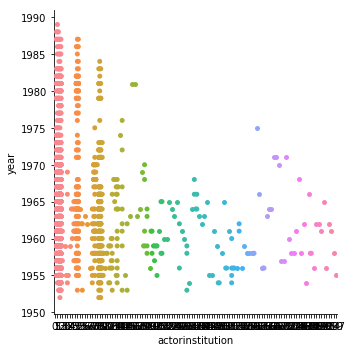

In [109]:
sns.catplot(y="year", x="actorinstitution", kind="swarm",
            data=events.query("year > 1950"))

In [110]:
y_P = pd.pivot_table(events, index=['year'],values=["migrant"], columns=events.actorperson, aggfunc=['count'])

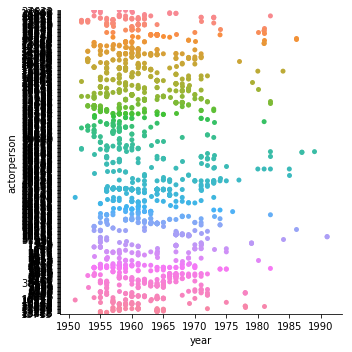

In [112]:
sns.catplot(x="year", y="actorperson", kind="swarm",
            data=events.query("year > 1950"))

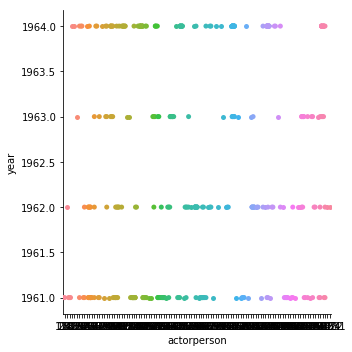

In [114]:
sns.catplot(y="year", x="actorperson", kind="swarm",
            data=events.query(" 1960 < year < 1965"))

In [121]:
pers = pd.read_csv('csvs/scored_pers.csv', sep='\t')
pers.head()

,Unnamed: 0,key_0,persoonsId,initialen,tussenvoegsel,achternaam,geboortejaar,hasBirthPlace,hasResidenceLocation,hasSchema,...,front_score,rest_score,normalized_religion,normalized_score,normalized_samenstelling,id,reis,age,age_bin,normalized_schemas
0,0,34120,34120,J.A.M.,NaN,Boschker,1932,NaN,Aalten,NAMA,...,4,3,catholic,medium,Gezin,34120,1956,24,20-25,NAMA
1,1,46567,46567,N.J.,NaN,Schipper,1933,NaN,Abbekerk,NAMA,...,2,1,catholic,empty,Alleen,46567,1955,22,20-25,NAMA
2,2,3053,3053,Th.H.A.,van den,Broek,1914,NaN,Afferden,NAMA,...,4,7,catholic,dense,Gezin,3053,1958,44,40-45,NAMA
3,3,3053,3053,Th.H.A.,van den,Broek,1914,NaN,NaN,LP-VER,...,4,7,NaN,dense,Echtpaar,3053,1958,44,40-45,LP
4,4,5515,5515,L.F.,van,Esseveld,1892,Oosbaan,Alkmaar,LP,...,3,4,protestant,large,Echtpaar,5515,1953,61,55-60,LP


In [147]:
catholics = pers.query("normalized_religion == 'catholic'")
rkid = catholics.persoonsId.unique()
rkid

array([34120, 46567,  3053, 44980,  1340,  1536,  4260,  8280,  8471,
       11710, 28094, 33924, 43841, 44119, 46778, 47558,  1116, 41835,
       31078, 49622, 20651,  3731,  5027, 32712, 46179, 36806, 31221,
       32809, 33867, 24289,  4736, 10834, 26617,  3710, 26717, 32223,
       34268, 34650, 37405, 41065,  9872,  3510, 22237, 47165, 24868,
       39670, 10053, 32416, 32613, 10151, 40775, 42733, 34973, 43383,
       38076, 48975, 45174, 44854, 26994, 24097, 37308, 38564, 38274,
       42418, 10573, 24973, 39042, 45525, 43189, 49939,  4928, 37100,
       48598, 23328, 34365, 49365, 39327, 42223,  9498,  9500, 25353,
       49267, 11965,  7218, 12859, 42317, 42322, 47744,  4712,  6912,
        8085, 36125, 39888, 47293, 49170,  5296, 42509, 33677,  4116,
       40968, 41296, 41524, 35262, 36616, 10250, 50328, 38851, 26423,
       27323,   321, 26519, 36255, 49526,  2522,  2717,  3630,  3920,
        5710,  7989,  8566,  8591,  8922, 12265, 13029, 23805, 30393,
       33490, 41163,

In [125]:
steekproef.sheet_names

['emmigrantunits',
 'emcards',
 'emtravels',
 'emwaardeoordeels',
 'emimages',
 'emevents',
 'emactors',
 'emactorinstitutions',
 'lookup_instellingen',
 'emeventtypes',
 'emcardcatalogs',
 'emconsulates',
 'emvervoermiddels',
 'emtypevervoers',
 'emschemas',
 'emlocations',
 'emreligions',
 'orig',
 'reserve']

In [128]:
actors = steekproef.parse('emactors')
actors.drop(actors.index[:2], axis=0, inplace=True)
actors.head()

,nr,achternaam,voorletters,tussenvoegsel,opschrift,Naam persoon,instelling,functie,jaar,plaatsing,bijzonderheden,instelling.1,Unnamed: 12,Unnamed: 13,Unnamed: 14
2,46.0,Jol,J.W.,NaN,mej.,"Jol, J.W. mej.",NaN,ass. emigratie ambtenaar,1959,AU,NaN,NaN,NaN,NaN,NaN
3,106.0,Griend,P.,van der,NaN,"Griend, P. van der",NaN,emigratie ambtenaar,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,Blome,W.,NaN,NaN,"Blome, W.",NaN,emigratie attache,1963,NaN,NaN,NaN,NaN,NaN,NaN
5,30.0,Schelven,C.Ph.,van,NaN,"Schelven, C.Ph. van",Emigratiekantoor Sydney,sociaal werkster,1962,NaN,NaN,134,Emigratiekantoor Perth,NaN,NaN
6,147.0,Scheeren,J.H.M.,NaN,NaN,"Scheeren, J.H.M.",NaN,emigratie ambtenaar,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [132]:
def get_actor(id):
    return actors.query("nr == {}".format(int(id) ))

get_actor(46)

,nr,achternaam,voorletters,tussenvoegsel,opschrift,Naam persoon,instelling,functie,jaar,plaatsing,bijzonderheden,instelling.1,Unnamed: 12,Unnamed: 13,Unnamed: 14
2,46.0,Jol,J.W.,NaN,mej.,"Jol, J.W. mej.",NaN,ass. emigratie ambtenaar,1959,AU,NaN,NaN,NaN,NaN,NaN


In [199]:
actors.nr = actors.nr.astype('int64')


ValueError: cannot reindex from a duplicate axis

In [205]:
actors.nr

2       46
3      106
4        3
5       30
6      147
7      164
8      178
9        1
10       2
11       2
12       4
13       6
14       7
15       8
16       9
17      10
18      11
19      13
20      14
21      15
22      16
23      17
24      18
25      19
26      20
27      21
28      22
29      23
30      24
31      25
      ... 
493    886
494    890
495    894
496    895
497    898
498    890
499    892
500    893
501    897
502    898
503    899
504    903
505    904
506    907
507    908
508    913
509    915
510    916
511    917
512    918
513    924
514    925
515    927
516    931
517    932
518    933
519    935
520    938
521    939
522    940
Name: nr, Length: 521, dtype: int64

In [207]:
rkactors = events.loc[events.migrant.isin(rkid)]["actorperson.1"]

rkactors = rkactors.dropna()
rkactors = rkactors.astype('int64')
rkactors.unique()
actors.loc[actors.nr.isin(rkactors.unique())]

,nr,achternaam,voorletters,tussenvoegsel,opschrift,Naam persoon,instelling,functie,jaar,plaatsing,bijzonderheden,instelling.1,Unnamed: 12,Unnamed: 13,Unnamed: 14
3,106,Griend,P.,van der,NaN,"Griend, P. van der",NaN,emigratie ambtenaar,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,30,Schelven,C.Ph.,van,NaN,"Schelven, C.Ph. van",Emigratiekantoor Sydney,sociaal werkster,1962,NaN,NaN,134,Emigratiekantoor Perth,NaN,NaN
6,147,Scheeren,J.H.M.,NaN,NaN,"Scheeren, J.H.M.",NaN,emigratie ambtenaar,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,178,Mossel,C.,NaN,NaN,"Mossel, C.",NaN,emigratie ambtenaar Brisbane,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,2,Banning,NaN,v.,hr,"Banning, hr v.",EK Melbourne,NaN,1958,NaN,NaN,175,NaN,NaN,NaN
11,2,Banning,NaN,v.,hr,NaN,EK Sydney,emigratie ambtenaar Sydney,1956,NaN,NaN,NaN,NaN,NaN,NaN
25,19,Ko,NaN,NaN,hr,"Ko, hr",EK Sydney,NaN,1959,NaN,NaN,175,NaN,NaN,NaN
39,35,Versluijs,NaN,NaN,NaN,Versluijs,RK-Kerk,Pater,1959,NaN,NaN,38,NaN,NaN,NaN
51,64,Watson,NaN,NaN,mw,"Watson, mw",Department of Immigration,NaN,1955,AU,NaN,142,NaN,NaN,NaN
76,120,Maas,Ch.L.,NaN,NaN,"Maas, Ch.L.",RK-Kerk,Pater,NaN,NaN,NaN,38,NaN,NaN,NaN


<Figure size 432x288 with 0 Axes>

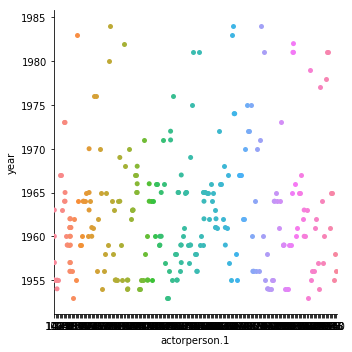

In [208]:
fig = plt.figure()

sns.catplot(y="year", x="actorperson.1", kind="swarm",
            data=events.loc[events.year > 1950])